In [24]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
filename = 'gss_bayes.csv'
df = pd.read_csv(filename)
df.head()

,caseid,year,age,sex,polviews,partyid,indus10
0,1,1974,21.0,1,4.0,2.0,4970.0
1,2,1974,41.0,1,5.0,0.0,9160.0
2,5,1974,58.0,2,6.0,1.0,2670.0
3,6,1974,30.0,1,5.0,4.0,6870.0
4,7,1974,48.0,1,5.0,4.0,7860.0


In [25]:
df["is_banker"] = df.indus10 == 6870

<AxesSubplot:title={'center':'Histogram of Banker vs. Non-Banker'}>

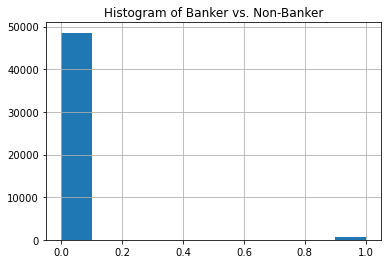

In [29]:
plt.title("Histogram of Banker vs. Non-Banker");
df.is_banker.astype(int).hist()

In [12]:
# Proportion of Bankers, 6870 is the banker code
banker = df["indus10"] == 6870
banker.mean().round(4)

0.0148

In [9]:
# Probability function 
def prob(A):
    """Accepts a series/array of booleans and returns the proportion of population that matches"""
    return A.mean()

In [10]:
prob(banker)

0.014769730168391155

In [40]:
# Probability of someone in this dataset being a woman
female = women = df.sex == 2
prob(women)

0.5378575776019476

In [13]:
# Probability of being on the liberal side of things
liberal = df["polviews"] <= 3
prob(liberal)

0.27374721038750255

In [14]:
# Probility of being a democrat
democrat = df['partyid'] <= 1
prob(democrat)

0.3662609048488537

## Conjunction
- Conjunction == Logical AND
- p(a & b) == p(b & a)
- Commutative

In [17]:
prob(banker & women & liberal)

0.002556299452221546

In [18]:
# Conjunction is commutative b/c AND is commutative
prob(banker & women) == prob(women & banker)

True

## Conditional Probability
- What is the probability that a respondent is a democrat, given that they are liberal?
- What is the prob(female) given that they are a banker?
- What is the prob(banker) given that they are a woman?

Let’s start with the first one, which we can interpret like this: “Of all the respondents who are liberal, what fraction are Democrats?”

In [19]:
selected = democrat[liberal]
selected.mean()

0.5206403320240125

In [20]:
women[banker].mean()

0.7706043956043956

In [21]:
def conditional(proposition, given):
    """Probability of A conditioned on given."""
    return prob(proposition[given])

In [25]:
# Probability of being both a liberal and democrat
prob(liberal & democrat)

0.1425238385067965

In [23]:
# Probability of being a liberal given we know that they're a democrat
conditional(liberal, given=democrat)

0.3891320002215698

In [26]:
# Probability of being a democrat given we know that they're liberal
conditional(democrat, given=liberal)

0.5206403320240125

In [35]:
# Probability of someone being a woman given that they're a banker
# Of the folks who are bankers, 77% are women
df[banker].sex.value_counts(normalize=True)

2    0.770604
1    0.229396
Name: sex, dtype: float64

In [30]:
# Probability of someone being a woman given that they're a banker
# Of the folks who are bankers, 77% are women
conditional(women, given=banker)

0.7706043956043956

In [31]:
# Probability of someone being a banker given that they're a woman
# Of all women, 2% are bankers
conditional(banker, given=women)

0.02116102749801969

In [32]:
# Probability of someone being a banker, given that they're a woman
# Of all women, what's the likelihood of being a banker?
df[women].indus10.value_counts(normalize=True)[6870]

0.02116102749801969

In [33]:
# Contitional Probabilities AIN'T commutative!!!
conditional(women, given=banker) == conditional(banker, given=women)

False

### Condition and Conjunction


In [42]:
# probability of someone being a woman given that we know they're a liberal and a democrat
conditional(female, given=liberal & democrat)

0.576085409252669

In [43]:
conditional(liberal & female, given=banker)

0.17307692307692307

## Laws of Probability

In the next few sections, we’ll derive three relationships between conjunction and conditional probability:

- Theorem 1: Using a conjunction to compute a conditional probability.

- Theorem 2: Using a conditional probability to compute a conjunction.

- Theorem 3: Using `conditional(A, B)` to compute `conditional(B, A)`.

<hr>

- Theorum 1: $P(A)$ is the probability of proposition 𝐴.

- Theorum 2: $P(A and B)$ is the probability of the conjunction of 𝐴 and 𝐵, that is, the probability that both are true.

- Theorum 3: $P(A|B)$ is the conditional probability of 𝐴 given that 𝐵 is true. The vertical line between 𝐴 and 𝐵 is pronounced “given”.

## Theorum 1: P(A) is the probability of proposition A (using a conjunction to compute conditional probability)

There is another way to compute this conditional probability, by computing the ratio of two probabilities:

- The fraction of respondents who are female bankers, and
- The fraction of respondents who are bankers.

$$P(A|B) = \frac{P(A and B)}{ P(B)}$$


In [48]:
conditional(female, given=banker)

0.7706043956043956

In [46]:
female[banker].mean()

0.7706043956043956

In [51]:
# Probability of being both female and a banker divided by the probability of being a banker
# p(a & b) / p(b) = p(a|b)

prob(female & banker) / prob(banker)

0.7706043956043956

## Theorum 2 
- If we start with Theorem 1 and multiply both sides by 𝑃(𝐵), we get Theorem 2.
- This formula suggests a second way to compute a conjunction: instead of using the & operator, we can compute the product of two probabilities.

$$P(A and B) = P(B) * P(A|B)$$

In [52]:
prob(liberal & democrat)

0.1425238385067965

In [53]:
# And here’s the result using Theorem 2:

prob(democrat) * conditional(liberal, given=democrat)

0.1425238385067965

## Theorum 3
- Conjunction is commutative $P(A and B) = P(B and A)$
- If we apply Theorem 2 to both sides, we have $𝑃(𝐵)𝑃(𝐴|𝐵)=𝑃(𝐴)𝑃(𝐵|𝐴)$
- Then if we divicde through by P(B), we get Theorum 3, which is Bayes's Theorum!

Bayes Theorum:

$$P(A|B) = \frac{P(A)P(B|A)}{P(B)}$$

In [54]:
conditional(liberal, given=banker)

0.2239010989010989

In [55]:
prob(liberal) * conditional(banker, given=liberal) / prob(banker)

0.2239010989010989

## Law of Total Probability

$$P(A) = P(B_1 and A) + P(B_2 and A)$$

- The probability of A is the sum of the two probabilies of $P(B_1 and A) + P(B_2 and A)$ where $B_1$ and $B_2$ are:
    - Mutually exclusive, meaning only one of $B_1$ or $B_2$ can be true and
    - Collectively exhaustive, meaning that one of them must be true

In [59]:
# At least in this dataset
male = ~female

In [56]:
prob(banker)

0.014769730168391155

In [60]:
prob(male * banker) + prob(female & banker)

0.014769730168391155

### When we apply Theorum 2, we can write this as
$$P(A) = P(B_1)P(A|B_1) + P(B_2)P(A|B_2)$$

In [61]:
(prob(male) * conditional(banker, given=male) +
prob(female) * conditional(banker, given=female))

0.014769730168391153

## Total Law of Probability Continued

- When there are more than two conditions, it is more concise to write the law of total probability as a summation:

$$P(A) = \sum_i P(B_i) P(A|B_i)$$

- Again, this holds as long as the conditions, $B_i$ are mutually exclusive and collectively exhaustive


In [63]:
B = df['polviews']
B.value_counts().sort_index()

1.0     1442
2.0     5808
3.0     6243
4.0    18943
5.0     7940
6.0     7319
7.0     1595
Name: polviews, dtype: int64

In [65]:
# On this scale, 4.0 represents “Moderate”. So we can compute the probability of a moderate banker like this:

i = 4
prob(B==i) * conditional(banker, B==i)

0.005822682085615744

In [66]:
# And we can use sum and a generator expression to compute the summation.

sum(prob(B==i) * conditional(banker, B==i)
    for i in range(1, 8))

0.014769730168391157

In [69]:
# generator expression
sum(i
    for i in range(1, 10))

45

# Summary

## Theorum 1

Gives us a way to compute a conditional probability using a conjunction

$$P(A|B) = \frac{P(A and B)}{P(B)}$$

## Theorum 2

Gives us a way to compute a conjunction using a conditional probability:
 
$$P(A and B) = P(B) P(A|B)$$


## Theorum 3
Also known as Bayes’s Theorem, gives us a way to get from 𝑃(𝐴|𝐵) to 𝑃(𝐵|𝐴), or the other way around:

$$P(A|B) = \frac{P(A)P(B|A)}{P(B)}$$

## The Total Law of Probability

The Law of Total Probability provides a way to compute probabilities by adding up the pieces:


$$P(A) = \sum_i P(B_i)P(A|B_i)$$

At this point you might ask, “So what?” If we have all of the data, we can compute any probability we want, any conjunction, or any conditional probability, just by counting. We don’t have to use these formulas.

And you are right, if we have all of the data. But often we don’t, and in that case, these formulas can be pretty useful – especially Bayes’s Theorem. In the next chapter, we’ll see how.

# Exercises

> Linda is 31 years old, single, outspoken, and very bright. She majored in philosophy. As a student, she was deeply concerned with issues of discrimination and social justice, and also participated in anti-nuclear demonstrations. Which is more probable?

- Linda is a banker.
- Linda is a banker and considers herself a liberal Democrat.

To answer this question, compute
- The probability that Linda is a female banker,
- The probability that Linda is a liberal female banker, and
- The probability that Linda is a liberal female banker and a Democrat.






In [70]:
# Probability that Linda is a banker
prob(banker & female)

0.011381618989653074

In [73]:
# The probability that Linda is a liberal female banker
prob(banker & female & liberal)

0.002556299452221546

In [72]:
# The probability that Linda is a liberal female banker and a Democrat.
prob(banker & female & liberal & democrat)

0.0012375735443294787

## Exercise: Use conditional to compute the following probabilities:

What is the probability that a respondent is liberal, given that they are a Democrat?

What is the probability that a respondent is a Democrat, given that they are liberal?

Think carefully about the order of the arguments you pass to conditional.

In [74]:
# probability that a respondent is liberal, given that they are a Democrat
conditional(liberal, given=democrat)

0.3891320002215698

In [77]:
# probability that a respondent is a Democrat, given that they are liberal
conditional(democrat, given=liberal)

0.5206403320240125

## Exercise: There’s a famous quote about young people, old people, liberals, and conservatives that goes something like:

> If you are not a liberal at 25, you have no heart. If you are not a conservative at 35, you have no brain.

Whether you agree with this proposition or not, it suggests some probabilities we can compute as an exercise. Rather than use the specific ages 25 and 35, let’s define young and old as under 30 or over 65:



In [78]:
young = df.age < 30
prob(young)

0.19435991073240008

In [79]:
old = df.age >= 65
prob(old)

0.17328058429701765

In [81]:
# Define conservative as someone whose political views are “Conservative”, “Slightly Conservative”, or “Extremely Conservative”.
conservative = (df['polviews'] >= 5)
prob(conservative)

0.3419354838709677

Use prob and conditional to compute the following probabilities.

- What is the probability that a randomly chosen respondent is a young liberal?
- What is the probability that a young person is liberal?
- What fraction of respondents are old conservatives?
- What fraction of conservatives are old?

For each statement, think about whether it is expressing a conjunction, a conditional probability, or both.

For the conditional probabilities, be careful about the order of the arguments. If your answer to the last question is greater than 30%, you have it backwards!

In [82]:
prob(young & liberal)

0.06579427875836884

In [83]:
# Probability that a young person is liberal
conditional(liberal, given=young)

0.338517745302714

In [85]:
# What fraction of respondents are old conservatives?
prob(old & conservative)

0.06701156421180766

In [86]:
# What fraction of conservatives are old?
conditional(old, given=conservative)

0.19597721609113564